In [145]:
#%%
# Preprocessing Signals

import pandas as pd
import heartpy as hp
import neurokit2 as nk
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
import datetime as datetime
import os

Each of the ten samples given has been saved to one Excel Workbook (see load_files.py).

## Explore Data File:
I will start by visualising the Red, Blue, and Green channels so that I can observe the amount of noise before filtering. 

In [146]:
os.chdir('/home/jazzy/Documents/PPS-Project')
ppg_db_1 = pd.read_excel('full_raw_ppg_data.xlsx', sheet_name = 'ppg_db_1')




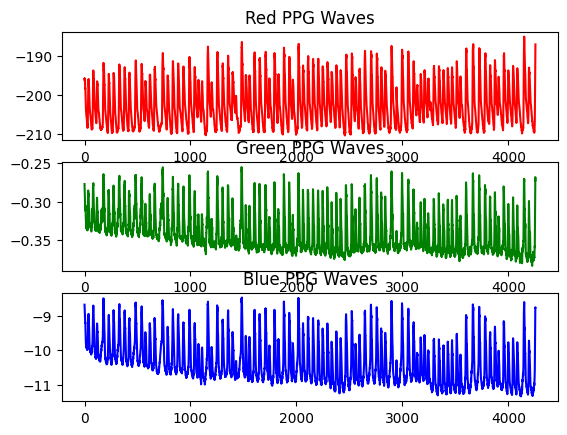

In [147]:

fig, ax = plt.subplots(3)

ax[0].plot(ppg_db_1['Red'].values, color = 'red')
ax[0].set_title('Red PPG Waves')

ax[1].plot(ppg_db_1['Green'].values, color = 'green')
ax[1].set_title('Green PPG Waves')

ax[2].plot(ppg_db_1['Blue'].values, color = 'blue')
ax[2].set_title('Blue PPG Waves')

plt.show()

Next, I'll look at a segment to have a closeer look

59.77856394023816


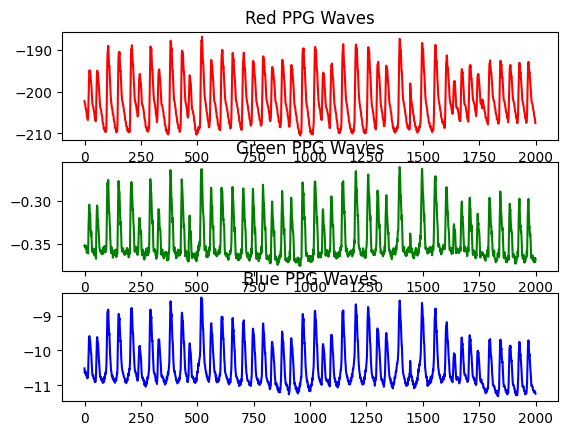

In [148]:
fig, ax = plt.subplots(3)

ax[0].plot(ppg_db_1['Red'].values[1500:3500], color = 'red')
ax[0].set_title('Red PPG Waves')

ax[1].plot(ppg_db_1['Green'].values[1500:3500], color = 'green')
ax[1].set_title('Green PPG Waves')

ax[2].plot(ppg_db_1['Blue'].values[1500:3500], color = 'blue')
ax[2].set_title('Blue PPG Waves')

print(max(ppg_db_1['time']))
plt.show()

To calculate the sampling rate(number of samples per millisecond). To convert seconds to milliseconds we need to do sec * 1000. 

In [149]:

ppg_db_1['time2'] = ppg_db_1['time'] * 1000
print(ppg_db_1['time'].dtype)
print(ppg_db_1['time2'].values[0:20], len(ppg_db_1['time2'].values))



float64
[  0.          13.29890188  26.59780376  39.89670563  53.19560751
  66.49450939  79.79341127  93.09231314 106.39121502 119.6901169
 132.98901878 146.28792065 159.58682253 172.88572441 186.18462629
 199.48352817 212.78243004 226.08133192 239.3802338  252.67913568] 4256


In [150]:
os.chdir('/home/jazzy/Documents/PPS-Project/Raw_PPG_Files')
Red1 = ppg_db_1['Red'].values
Green1 = ppg_db_1['Green'].values
Blue1 = ppg_db_1['Blue'].values
timer = ppg_db_1['time2'].values

sample_rate = hp.get_samplerate_mstimer(timer)
print(sample_rate)






71.19608969286732


/home/jazzy/.local/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1200x400 with 0 Axes>

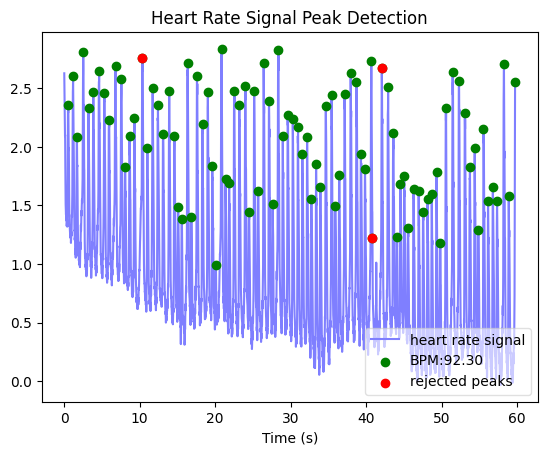

bpm: 92.297930
ibi: 650.068749
sdnn: 114.303267
sdsd: 97.138502
rmssd: 158.203553
pnn20: 0.890244
pnn50: 0.695122
hr_mad: 84.274291
sd1: 111.843132
sd2: 116.797451
s: 41038.602028
sd1/sd2: 0.957582
breathingrate: 0.200000


In [151]:
wd, m  = hp.process(Blue1, sample_rate = sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd,m)

plt.show()
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

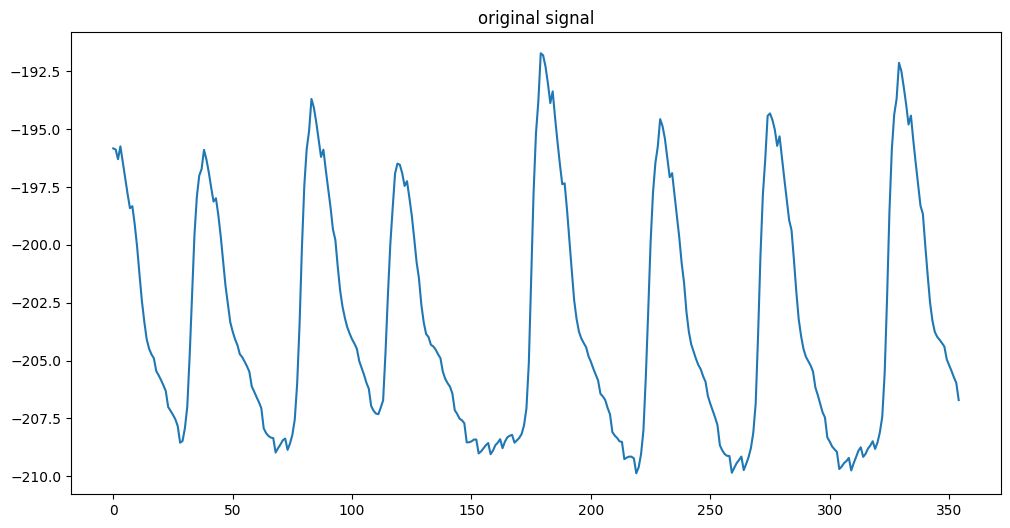

In [152]:
plt.figure(figsize=(12,6))
plt.plot(Red1[0:int(5* sample_rate)])
plt.title('original signal')
plt.show()

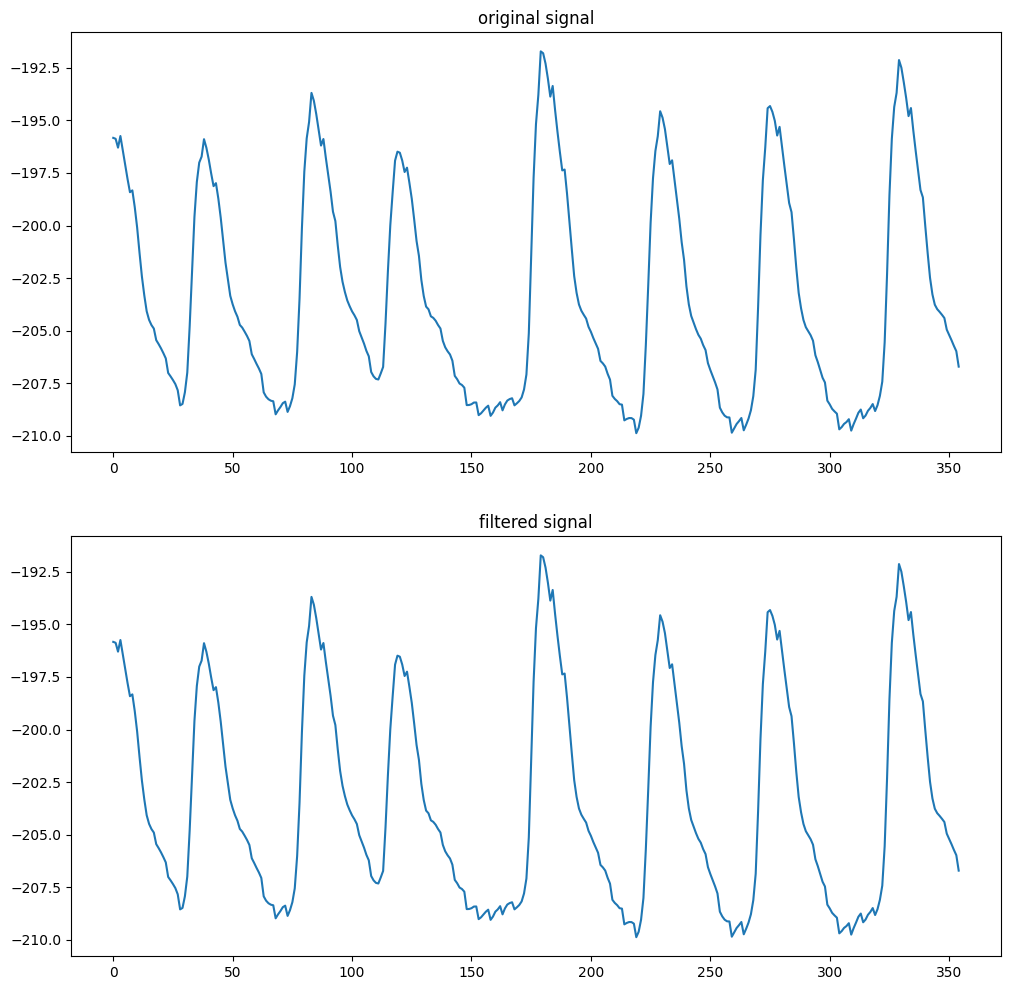

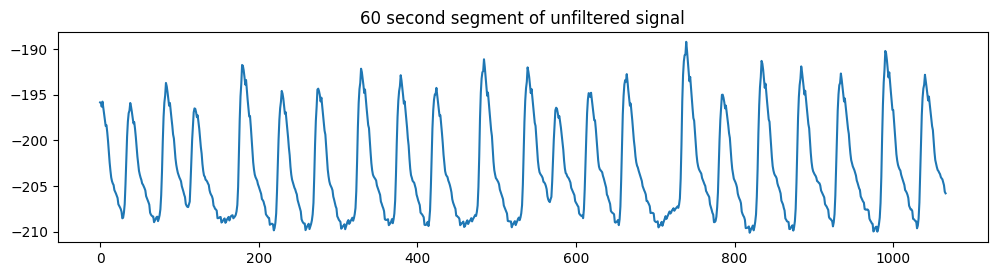

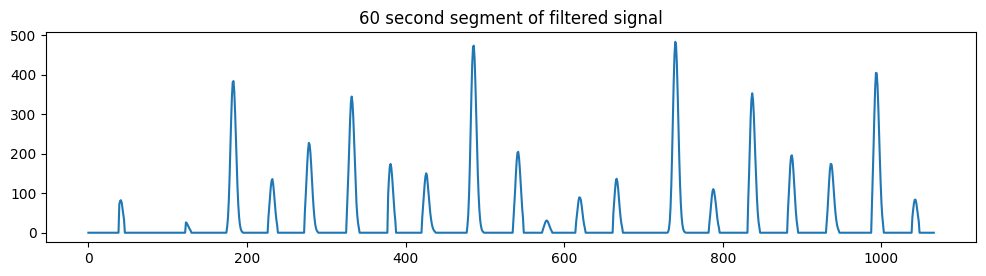

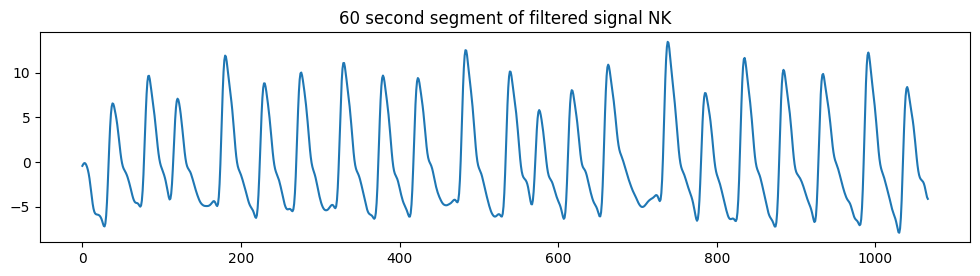

In [153]:
filtered = hp.filter_signal(Red1, [0.7, 3.5], sample_rate=sample_rate, 
                            order=3, filtertype='bandpass')
filtered = hp.hampel_correcter(filtered, sample_rate=sample_rate)
filtered = hp.enhance_peaks(filtered)

ppg_clean=nk.ppg_clean(Red1, sampling_rate = sample_rate)

#let's plot first 240 seconds and work with that!
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(Red1[0:int(5 * sample_rate)])
plt.title('original signal')
plt.subplot(212)
plt.plot(Red1[0:int(5 * sample_rate)])
plt.title('filtered signal')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(Red1[0:int(sample_rate * 15)])
plt.title('60 second segment of unfiltered signal')
plt.show()
plt.figure(figsize=(12,6))
plt.subplot(212)
plt.plot(filtered[0:int(sample_rate * 15)])
plt.title('60 second segment of filtered signal')
plt.show()
plt.figure(figsize=(12,6))
plt.subplot(212)
plt.plot(ppg_clean[0:int(sample_rate * 15)])
plt.title('60 second segment of filtered signal NK')
plt.show()



<Figure size 1500x800 with 0 Axes>

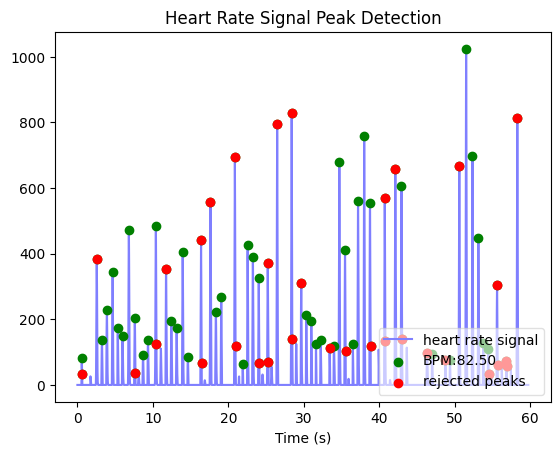

bpm: 82.501907
ibi: 727.255921
sdnn: 91.053391
sdsd: 84.335683
rmssd: 128.943780
pnn20: 0.944444
pnn50: 0.777778
hr_mad: 56.182861
sd1: 89.108365
sd2: 88.656227
s: 24818.617781
sd1/sd2: 1.005100
breathingrate: 0.203811


In [154]:


wd, m  = hp.process(filtered, sample_rate = sample_rate)

plt.figure(figsize=(15,8))
hp.plotter(wd,m)

plt.show()
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

/home/jazzy/.local/lib/python3.8/site-packages/heartpy/visualizeutils.py:299: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


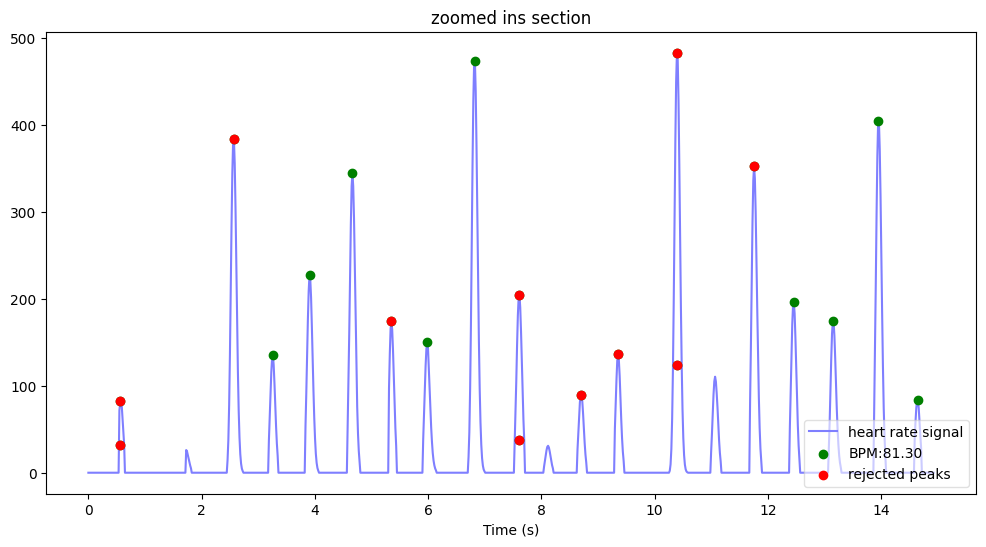

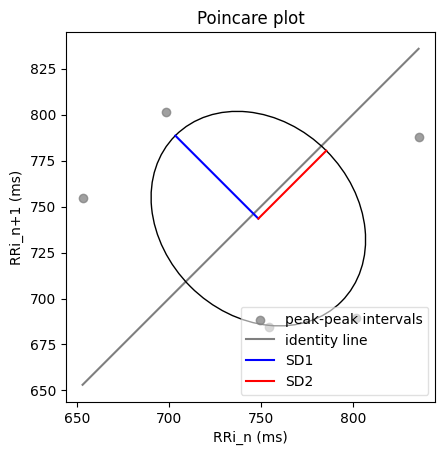

bpm: 81.298054
ibi: 738.025049
sdnn: 61.626716
sdsd: 24.106555
rmssd: 90.376079
pnn20: 1.000000
pnn50: 0.800000
hr_mad: 51.660003
sd1: 63.799297
sd2: 52.222099
s: 10466.948555
sd1/sd2: 1.221692
breathingrate: 0.338926


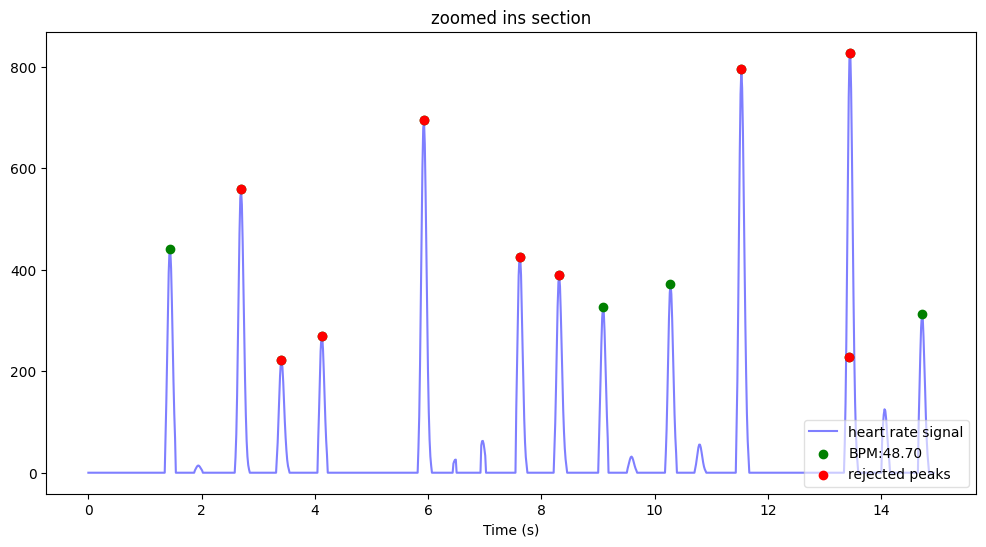

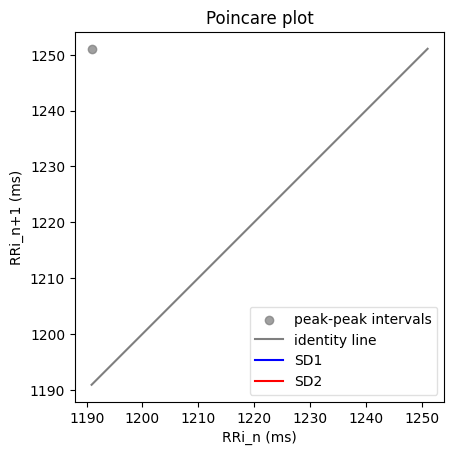

bpm: 48.700994
ibi: 1232.007700
sdnn: 29.103361
sdsd: 0.000000
rmssd: 60.182861
pnn20: 1.000000
pnn50: 1.000000
hr_mad: 3.000000
sd1: 0.000000
sd2: 0.000000
s: 0.000000
sd1/sd2: nan
breathingrate: nan


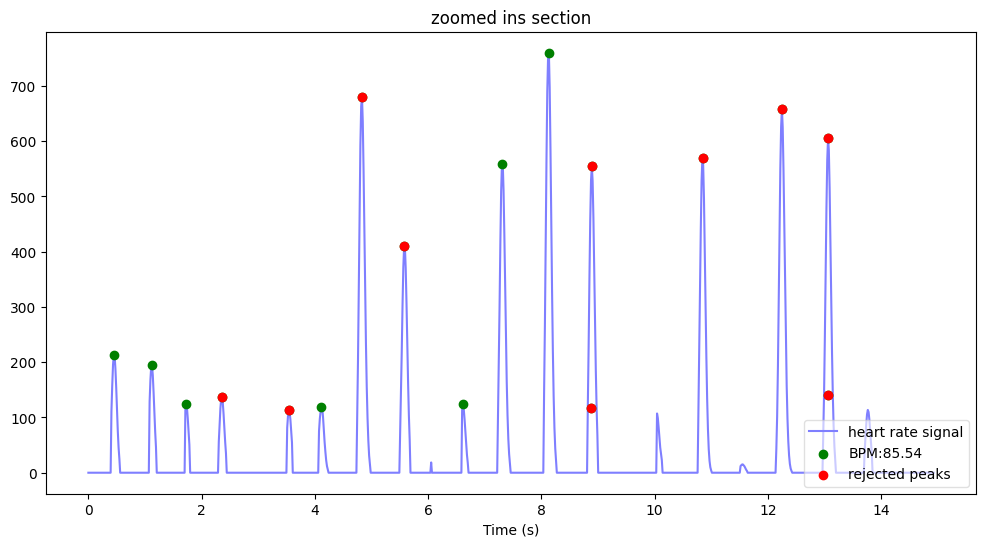

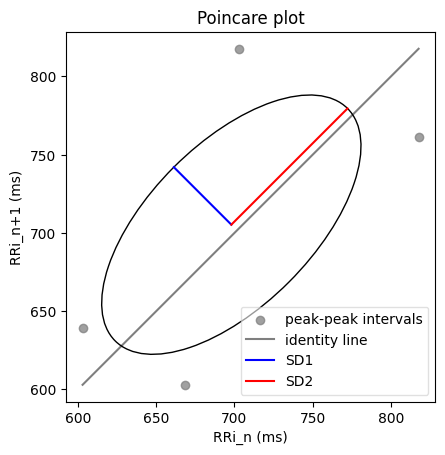

bpm: 85.540506
ibi: 701.422087
sdnn: 67.685212
sdsd: 28.821307
rmssd: 73.857043
pnn20: 1.000000
pnn50: 0.750000
hr_mad: 58.228576
sd1: 51.970993
sd2: 105.022946
s: 17147.273903
sd1/sd2: 0.494854
breathingrate: 0.203791


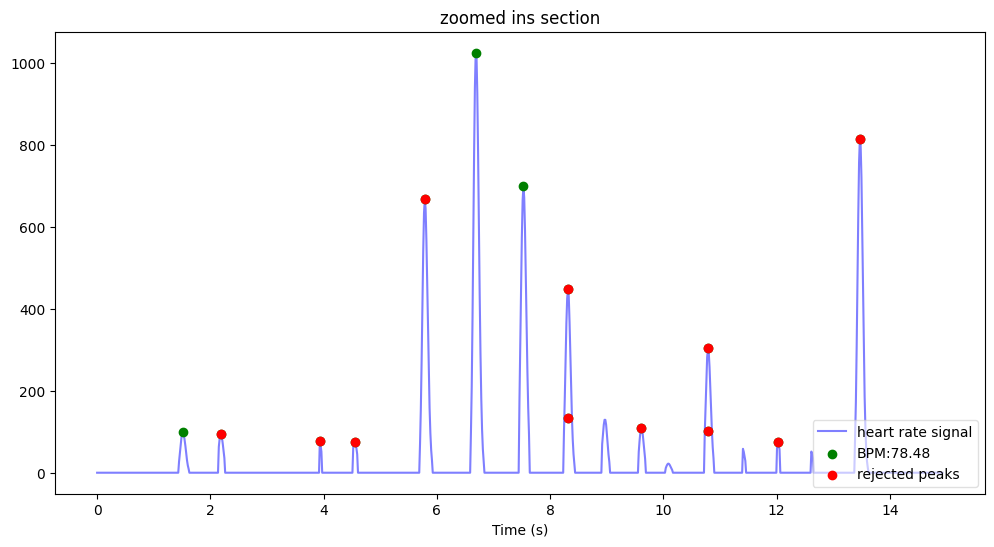

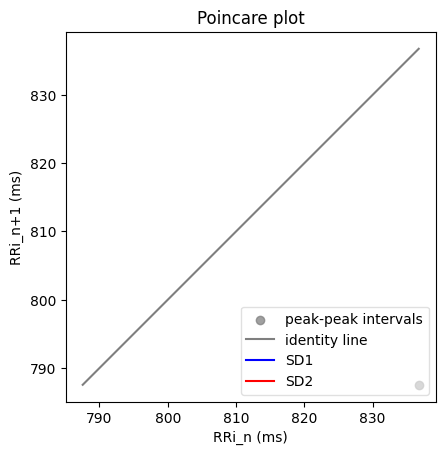

bpm: 78.482761
ibi: 764.499098
sdnn: 70.318265
sdsd: 0.000000
rmssd: 49.182861
pnn20: 1.000000
pnn50: 0.000000
hr_mad: 49.182861
sd1: 0.000000
sd2: 0.000000
s: 0.000000
sd1/sd2: nan
breathingrate: nan


In [155]:
from scipy.signal import resample


for s in [0,1064], [1064,2128], [2128,3192], [3192, 4256]:
    wd, m = hp.process(filtered[s[0]:s[1]], sample_rate = sample_rate, 
                       high_precision=True, clean_rr=True)
    hp.plotter(wd, m, title= 'zoomed ins section', figsize=(12,6))
    hp.plot_poincare(wd, m)
    plt.show()
    for measure in m.keys():
        print('%s: %f' %(measure, m[measure]))
    
